2


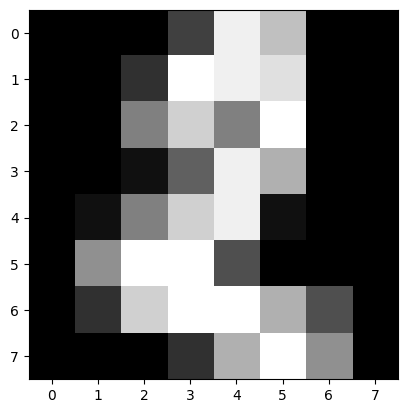

In [1]:
# Importación de librerías

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Cargo un dataset de imágenes de números

digits = load_digits()
X, y = digits.data, digits.target
idx = 2
img = X[idx,:].reshape(8, 8)
print(y[idx])
plt.imshow(img, cmap="gray")
plt.show()

In [2]:
# Se separan los datos en train + test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Se define un modelo Random Forest y se encuentran los mejores hiperparámetros

clf = RandomForestClassifier()
params = {"n_estimators" : [10, 50, 100, 200],
         "max_depth" : [5, 7, 9],
         "max_features": [10, "sqrt"]}
clf_grid = GridSearchCV(clf, params, cv=3, n_jobs=-1)
clf_grid.fit(X_train, y_train)
print(u'Mejores parámetros del modelo: {}'.format(clf_grid.best_params_))
print('- Accuracy de los datos de train: {} \n- Accuracy de los datos de test: {}'\
                        .format(clf_grid.score(X_train, y_train), 
                        round(clf_grid.score(X_test, y_test),2)))

Mejores parámetros del modelo: {'max_depth': 9, 'max_features': 10, 'n_estimators': 100}
- Accuracy de los datos de train: 1.0 
- Accuracy de los datos de test: 0.98
